<a href="https://colab.research.google.com/github/mayraberrones94/FCFM/blob/master/Analisis_de_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de sonido

A lo largo del tetramestre hemos visto los diferentes analisis de datos que existen, y sabemos que el area de aprendizaje profundo e inteligencia artificial por lo general se concentra mas en la parte de vision computacional o el analisis del lenguaje natural.

En este caso, el analisis de audio, en donde se incluye el reconocimiento automatico del habla, clasificacion de musica, y procesamiento de senales, han creado un area de oportunidad en Machine learning. 

Algunos de los ejemplos mas famosos que conocemos son Alexa, Siri, Goggle home, etc. Que se encargan de extraer informacion por medio de senales de audio.

Hay muchas areas mas que se beneficial del uso de analisis de audio, por ejemplo en el area de productividad, salud, ciudades inteligentes.

Incluso existen algunas aplicaciones en el area de servicio a cliente, para poder tener un monitoreo mas sencillo de call centers.

## Archivos de Audio

Los extractos de audio con los que podemos trabajar son en formato .wav. Este tipo de sonido esta digitatizado con un metodo de sampling en un intervalo discreto que se le conoce como sampling rate. 

Por ejemplo, nosotros tenemo un archivo de audio de calidad 44.1 kHz, lo que significa que las muestras que tenemos son de 44,100 por segundo.

Cada muestra es la amplitud de la onda en un intervalo de tiempo particular, donde la profundidad de bits determina qué tan detallada será la muestra, también conocida como el rango dinámico de la señal.

> Concepto de Sampling: El muestreo es la reducción de una señal continua a una serie de valores discretos. La frecuencia o tasa de muestreo es el número de muestras tomadas durante un período de tiempo fijo. Una frecuencia de muestreo alta da como resultado una menor pérdida de información pero un gasto computacional más alto, y las frecuencias de muestreo bajas tienen una mayor pérdida de información pero son rápidas y menos costosas de calcular.

## Como manejar archivos de audio

El sonido esta represetado por diferentes parametros como lo son la frecuencia, el ancho de banca, los decibeles, etc. De manera sencilla una senal de audio puede expresarse por medio de la funcion de amplitud y tiempo, como se muestra en la imagen siguente.

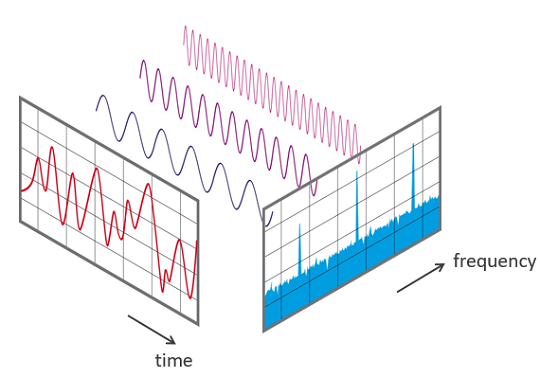

In [20]:
import librosa

In [21]:
audio_data = '/content/drive/MyDrive/Datasets/Aunlabelledtest__201012172010.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [22]:
librosa.load(audio_data, sr=44100)

(array([-6.1035156e-05, -2.7465820e-04,  0.0000000e+00, ...,
         3.0517578e-05,  6.1035156e-05,  9.1552734e-05], dtype=float32), 44100)

In [23]:
import IPython.display as ipd
ipd.Audio(audio_data)

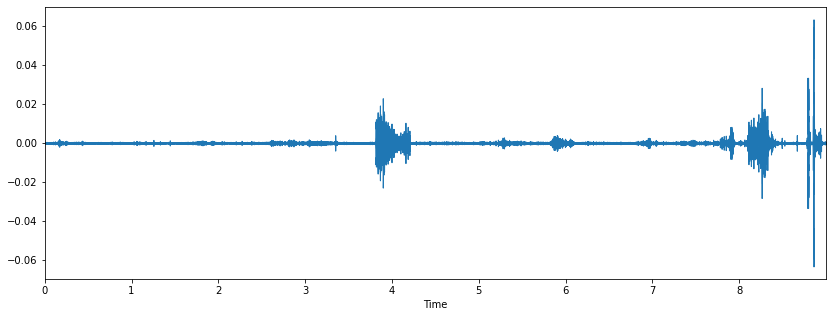

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

## Espectograma

Un espectrograma es una forma visual de representar la intensidad de la señal, o "volumen", de una señal a lo largo del tiempo en varias frecuencias presentes en una forma de onda particular. No solo se puede ver si hay más o menos energía en, por ejemplo, 2 Hz frente a 10 Hz, sino que también se puede ver cómo varían los niveles de energía con el tiempo.

Un espectrograma generalmente se representa como un mapa de calor, es decir, como una imagen con la intensidad mostrada al variar el color o el brillo.

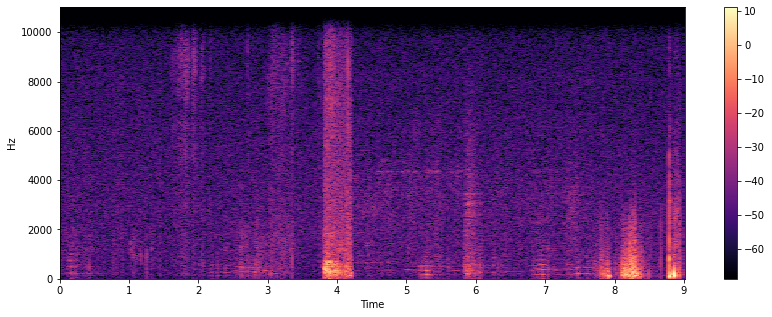

In [25]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

El eje vertical muestra las frecuencias (de 0 a 10 kHz) y el eje horizontal muestra el tiempo del clip. Como vemos que toda la acción tiene lugar en la parte inferior del espectro, podemos convertir el eje de frecuencia en uno logarítmico.

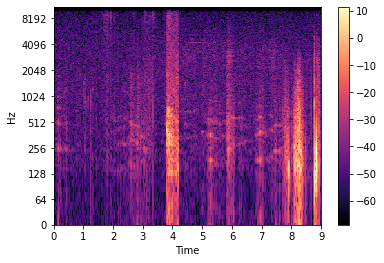

In [26]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Extraccion de caracteristicas principales

Cada señal de audio consta de muchas características. Sin embargo, debemos extraer las características que son relevantes para el problema que estamos tratando de resolver. El proceso de extracción de características para utilizarlas en el análisis se denomina extracción de características. Estudiemos algunas de las características en detalle.

Las características espectrales (características basadas en la frecuencia), que se obtienen al convertir la señal basada en el tiempo en el dominio de la frecuencia utilizando la Transformada de Fourier, como la frecuencia fundamental, los componentes de la frecuencia, el centroide espectral, el flujo espectral, la densidad espectral, la caída espectral, etc.

## Centroide espectral

El centroide espectral indica en qué frecuencia se centra la energía de un espectro o, en otras palabras, indica dónde se encuentra el "centro de masa" de un sonido.

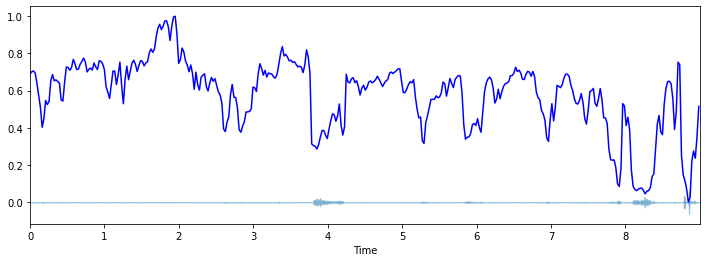

In [27]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

## Rolloff espectral

Es una medida de la forma de la señal. Representa la frecuencia a la que las frecuencias altas descienden a 0. Para obtenerlo, tenemos que calcular la fracción de bins en el espectro de potencia donde el 85% de su potencia está en las frecuencias más bajas.

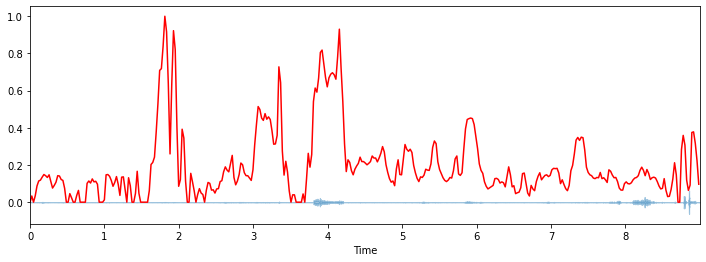

In [28]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## Ancho de banda espectral

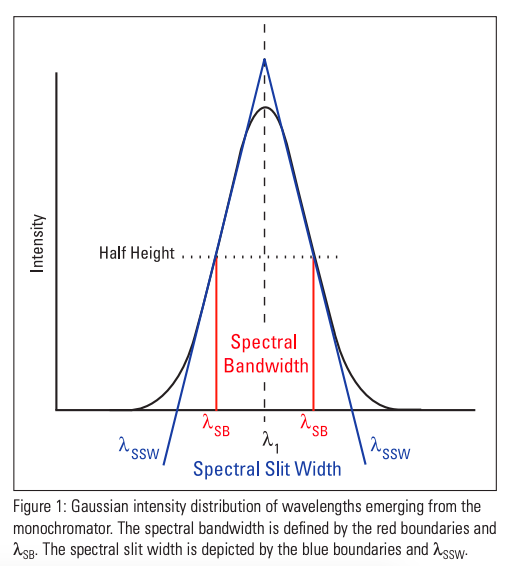

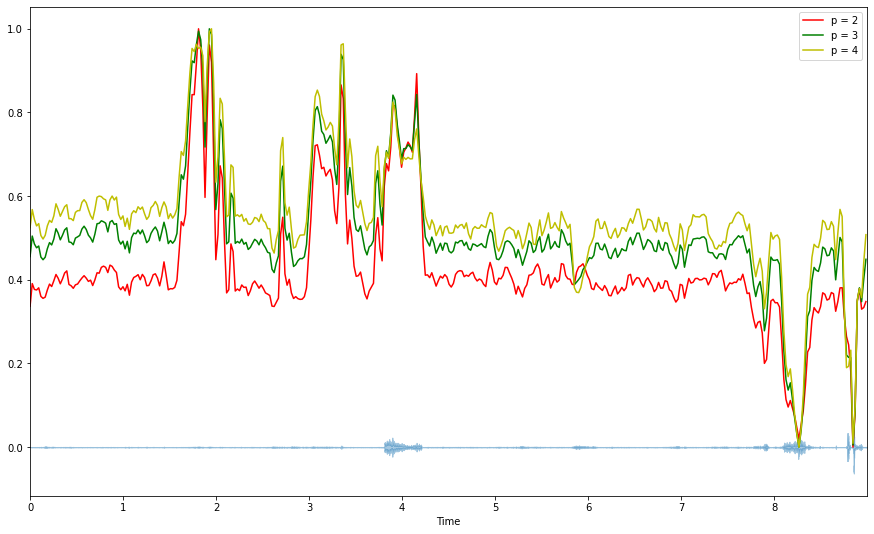

In [29]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))


In [33]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')


In [34]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'/content/drive/MyDrive/Datasets/Data/genres_original/{g}'):
        songname = f'/content/drive/MyDrive/Datasets/Data/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

IsADirectoryError: ignored

<Figure size 576x576 with 0 Axes>

In [35]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [39]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'/content/drive/MyDrive/Datasets/Data/genres_original/{g}'):
        songname = f'/content/drive/MyDrive/Datasets/Data/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)[0]
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

IsADirectoryError: ignored

In [48]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Data/features_30_sec.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=32)


Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 1.8617 - accuracy: 0.3425
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 1.1943 - accuracy: 0.6212
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.8676 - accuracy: 0.7100
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.7688
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.8325
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.8562
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3891 - accuracy: 0.8938
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.9087
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2639 - accuracy: 0.9362
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.9488
Epoch 11/50
25/25 [

## Links de ayuda

Para la base de datos utilizada: [Link](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification?datasetId=568973&sortBy=voteCount)

Para ejemplos de analisis de sonido:

- [Link 1: Analisis de latidos de corazon](https://www.kaggle.com/code/mychen76/heart-sounds-analysis-and-classification-with-lstm)
- [Link 2: Base de datos con sonidos varios](https://www.kaggle.com/code/fizzbuzz/beginner-s-guide-to-audio-data/data)
- [Link 3: Analisis de generos de musica](https://www.kaggle.com/code/andradaolteanu/work-w-audio-data-visualise-classify-recommend)

Complemento de informacion sobre procesamiento de sonido
- [Link 4](https://www.topcoder.com/thrive/articles/audio-data-analysis-using-python)
- [Link 5](https://hackernoon.com/audio-handling-basics-how-to-process-audio-files-using-python-cli-jo283u3y)
- [Link 6](https://medium.com/behavioral-signals-ai/intro-to-audio-analysis-recognizing-sounds-using-machine-learning-20fd646a0ec5)


Ayuda con redes:

- [Link 7](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validationhttps://github.com/tyiannak/basic_audio_analysis)